<a href="https://colab.research.google.com/github/kalakhushi18/Machine-Learning-Projects/blob/dev/Time_series_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

Link to the dataset:

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [ ]:
df = pd.read_csv('/content/sample_data/DailyDelhiClimateTrain.csv', parse_dates=True, index_col='date')

df = df.loc[:, ['meantemp']]

df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [ ]:
df.tail()

,meantemp
date,
2016-12-28,0.367391
2016-12-29,-1.979296
2016-12-30,-1.142857
2016-12-31,0.957393
2017-01-01,-5.052632


In [ ]:
#extracting only temp values
X = df.values
X

array([[10.        ],
       [ 7.4       ],
       [ 7.16666667],
       ...,
       [14.0952381 ],
       [15.05263158],
       [10.        ]])

<Axes: xlabel='date'>

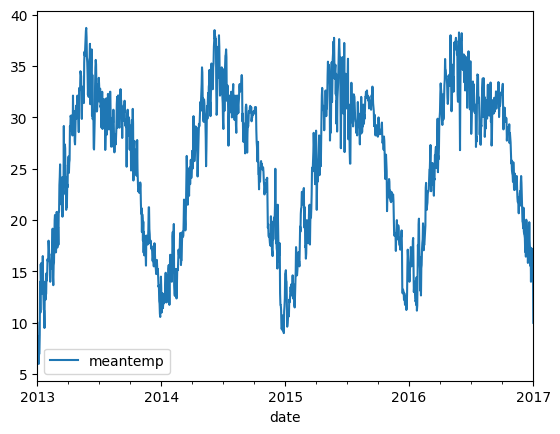

In [ ]:
#Plotting at first so as to get the analysis of the dataset
df.plot()

Check for Stationarity

statistical test such as adfuller is performed

In [ ]:
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(df['meantemp'], autolag = 'AIC')
print("P-value: ", df_test[1])

if df_test[1] < 0.05:
    print("Data is stationary, proceed with AR model")
else:
    print("Data is still non-stationary, consider further differencing or transformations.")

P-value:  0.2774121372301601
Data is still non-stationary, consider further differencing or transformations.


In [ ]:
# one order differncing
df = df.diff()


,meantemp
date,
2013-01-01,NaN
2013-01-02,-2.600000
2013-01-03,-0.233333
2013-01-04,1.500000
2013-01-05,-2.666667
...,...
2016-12-28,0.367391
2016-12-29,-1.979296
2016-12-30,-1.142857


In [ ]:
df.dropna(inplace = True)
df_test = adfuller(df['meantemp'], autolag = 'AIC')
print("P-value: ", df_test[1])

if df_test[1] < 0.05:
    print("Data is stationary, proceed with AR model")
else:
    print("Data is still non-stationary, consider further differencing or transformations.")

P-value:  2.764863137594644e-29
Data is stationary, proceed with AR model


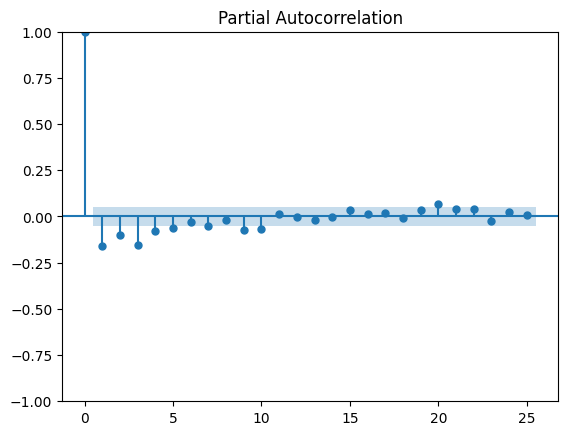

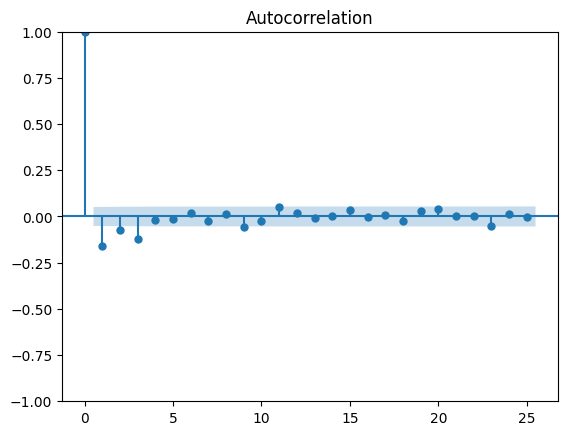

In [ ]:
#Always for AR Model the partial autocorrelation is used to detect the order
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['meantemp'], lags = 25)
acf = plot_acf(df['meantemp'], lags = 25)

Splitting the dataset into training and testing

Testing on last 30 days

In [ ]:
train = X[:len(X)-30]
test = X[len(X)-30:]

In [ ]:
model = AutoReg(train, lags=3).fit()


In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1432
Model:                     AutoReg(3)   Log Likelihood               -2722.380
Method:               Conditional MLE   S.D. of innovations              1.626
Date:                Mon, 28 Oct 2024   AIC                           5454.759
Time:                        22:55:51   BIC                           5481.083
Sample:                             3   HQIC                          5464.589
                                 1432                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5901      0.159      3.714      0.000       0.279       0.902
y.L1           0.8218      0.026     31.224      0.000       0.770       0.873
y.L2           0.0565      0.034      1.657      0.0

Making prediction on test set and compare

In [ ]:
prediction = model.predict(start= len(train), end= len(X)-1, dynamic= False)


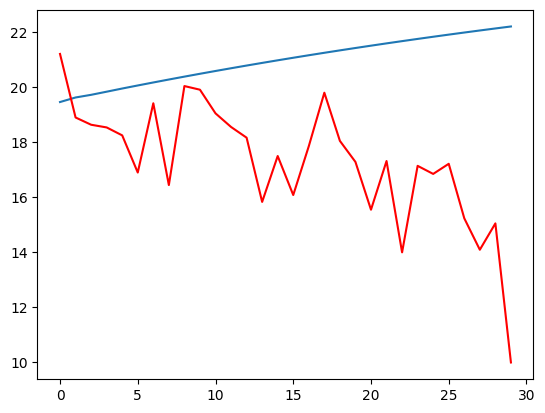

In [ ]:
plt.plot(prediction)
plt.plot(test, color = 'red')
plt.show()
prediction

Calculating error

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred=prediction, y_true= test))
print("RMSE: ", rmse)

RMSE:  4.622957113830488


In [ ]:
print(test.mean())

17.29637228014802


Future Predictions

In [ ]:
future_predictions = model.predict(start= len(X) + 1, end = len(X) + 30, dynamic= False)
print(f'Future predictions for next 30 days: ', future_predictions)
print(f'Number of predictions ', len(future_predictions))

Future predictions for next 10 days:  [22.34618973 22.41438868 22.4813678  22.54714889 22.61175339 22.67520235
 22.73751642 22.79871591 22.85882076 22.91785055 22.9758245  23.03276149
 23.08868009 23.14359849 23.1975346  23.25050598 23.30252989 23.35362328
 23.40380278 23.45308474 23.50148523 23.54902    23.59570454 23.64155405
 23.68658348 23.73080749 23.77424049 23.81689663 23.85878979 23.89993364]
Number of predictions  30
